In [17]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as inputData
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [67]:
data = inputData.read_data_sets('data', one_hot=True)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [70]:
def plotNumbers(imset, valset, dimen):
    fig, axis = plt.subplots(dimen[0],dimen[1])

    for pos, sub in enumerate(axis.flat):
        sub.imshow(imset[pos].reshape((28,28)))
        sub.set_xticks([])
        sub.set_yticks([])
        sub.set_xlabel('pred:%r' %valset[pos])
    plt.show()

In [74]:
num_of_epochs=400
batch_size = 100
accu_list = []
epoch_size = int(len(data.train.labels)/batch_size)

#L1:200, L2:100, L3:60, L4:30, L5:10
X  = tf.placeholder(tf.float32, shape=[None, 784])
Y_ori = tf.placeholder(tf.float32, shape=[None, 10])

W1 = tf.Variable(initial_value=tf.truncated_normal([784, 200], stddev=0.1))
W2 = tf.Variable(initial_value=tf.truncated_normal([200, 100], stddev=0.1))
W3 = tf.Variable(initial_value=tf.truncated_normal([100, 60], stddev=0.1))
W4 = tf.Variable(initial_value=tf.truncated_normal([60, 30], stddev=0.1))
W5 = tf.Variable(initial_value=tf.truncated_normal([30, 10], stddev=0.1))

b1 = tf.Variable(initial_value=tf.zeros(200))
b2 = tf.Variable(initial_value=tf.zeros(100))
b3 = tf.Variable(initial_value=tf.zeros(60))
b4 = tf.Variable(initial_value=tf.zeros(30))
b5 = tf.Variable(initial_value=tf.zeros(10))

af1 = tf.matmul(X, W1) + b1
Y1 = tf.nn.sigmoid(af1)
                 
af2 = tf.matmul(Y1, W2) + b2
Y2 = tf.nn.sigmoid(af2)
                 
af3 = tf.matmul(Y2, W3) + b3
Y3 = tf.nn.sigmoid(af3)
                 
af4 = tf.matmul(Y3, W4) + b4
Y4 = tf.nn.sigmoid(af4)
                 
af5 = tf.matmul(Y4, W5) + b5
Y_pred = tf.nn.softmax(af5)
                 
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=af5, labels=Y_ori)
cost = tf.reduce_mean(cross_entropy)
   
optimizer = tf.train.AdamOptimizer(0.009)
trainer = optimizer.minimize(cost)

correct_prediction = tf.equal(tf.argmax(Y_ori, axis=1), tf.argmax(Y_pred, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for val in range(epoch_size*num_of_epochs):
    train_batch_x, train_batch_y = data.train.next_batch(batch_size)
    sess.run(trainer, feed_dict={X: train_batch_x, Y_ori: train_batch_y})

    if (val/epoch_size)%5==0:
        accu_list.append(sess.run(accuracy, feed_dict={X: data.test.images, Y_ori: data.test.labels}))

print(accu_list)

[0.101, 0.969, 0.9668, 0.9715, 0.9702, 0.9749, 0.9732, 0.9717, 0.9729, 0.9739, 0.9726, 0.9739, 0.9753, 0.9772, 0.9746, 0.9746, 0.9766, 0.9759, 0.9728, 0.9733, 0.9765, 0.9752, 0.975, 0.9761, 0.9743, 0.9749, 0.978, 0.9767, 0.9764, 0.9754, 0.9746, 0.9755, 0.976, 0.9751, 0.9763, 0.9756, 0.9748, 0.9765, 0.9746, 0.9757, 0.9741, 0.9749, 0.9762, 0.9749, 0.9757, 0.9766, 0.9744, 0.9757, 0.9764, 0.975, 0.9746, 0.9752, 0.9745, 0.9765, 0.9732, 0.9751, 0.9735, 0.9744, 0.9754, 0.976, 0.9757, 0.9753, 0.9749, 0.976, 0.9759, 0.9749, 0.9756, 0.9737, 0.9782, 0.9752, 0.9765, 0.9748, 0.9772, 0.9774, 0.9757, 0.978, 0.9755, 0.9771, 0.9787, 0.9765]


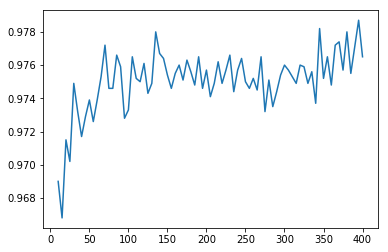

In [75]:
xVal = np.arange(10,num_of_epochs+5,5)
plt.plot(xVal, accu_list[1:])
plt.show()

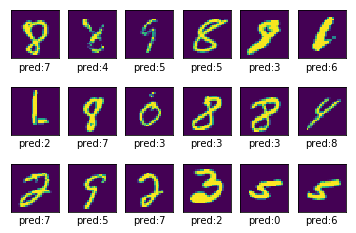

251

In [76]:
prediction = tf.argmax(Y_pred, axis=1)

predict_bool = sess.run(correct_prediction, feed_dict={X: data.test.images, Y_ori: data.test.labels})
predict_bool_inv = [not val for val in predict_bool]
failed_images = data.test.images[predict_bool_inv]

failed_pred = sess.run(prediction, feed_dict={X:failed_images})

plotNumbers(failed_images[200:218], failed_pred[200:218], dimen=(3,6))
len(failed_images)

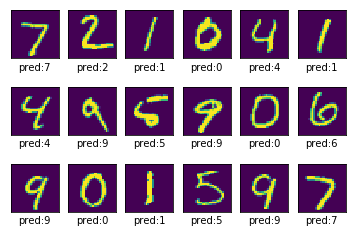

In [77]:
successful_images = data.test.images[predict_bool]
successful_pred = sess.run(prediction, feed_dict={X:successful_images})

plotNumbers(successful_images[0:18], successful_pred[0:18], dimen=(3,6))

In [78]:
test_pred = sess.run(prediction, feed_dict={X: data.test.images})
test_true = data.test.labels.argmax(axis=1)

confu_matri = confusion_matrix(test_true, test_pred)
print(confu_matri)

[[ 971    0    1    1    0    3    1    0    2    1]
 [   0 1120    4    3    1    1    2    1    3    0]
 [   5    2  995   11    3    1    2    8    5    0]
 [   1    1    2  987    0    9    0    3    6    1]
 [   1    1    2    0  962    0    5    2    1    8]
 [   3    0    1    9    1  869    3    1    2    3]
 [   5    2    0    1    4    6  935    0    5    0]
 [   0    1    7    3    2    2    0 1003    0   10]
 [   4    1    3   10    4    6    1    5  933    7]
 [   3    2    0    5   14    7    0    4    0  974]]


In [ ]:
#assign weight with truncated_normal()
# AdamOptimizer instead of GradientDescentOptimizer

In [ ]:
#epoch: 75
[0.0892, 0.9673, 0.9761, 0.9753, 0.9749, 0.9776, 0.9779, 0.9756, 0.973, 0.9753, 0.9769, 0.975, 0.976, 0.9751, 0.9743]
#epoch: 20, without *100
[0.1032, 0.9706, 0.9727, 0.9757]

#with gradient descent
[0.1028, 0.1135, 0.1135, 0.1135]

#wtih weights initialized as zero
[0.0958, 0.2801, 0.3346, 0.3598]